In [2]:
import pandas as  pd                  # For numerical operations (e.g., arrays, stats)
import pandas as pd                   # For data manipulation and reading CSV files
import matplotlib.pyplot as plt       # For plotting graphs
import seaborn as sns                 # For advanced visualizations
import datetime as dt                 # For handling date and time formats
import warnings
warnings.filterwarnings('ignore')  # Suppresses warning messages for cleaner output

 # Load the dataset
df = pd.read_csv("C:/Users/Bagnath/Downloads/CoffeeSales/coffee_sales.csv")
 
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [3]:
pd.DataFrame(
    df['coffee_name']
    .value_counts(normalize=True)     # Get proportions instead of raw counts
    .sort_values(ascending=False)     # Sort from most to least popular
    .round(4) * 100                   # Round to 4 decimals and convert to percentage
)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


 Insight Summary
- Top Tier: Americano With Milk and Latte dominate sales—nearly half of all transactions.
- Middle Tier: Cappuccino and Americano are solid performers.
- Lower Tier: Cortado, Hot Chocolate, Espresso, and Cocoa are niche choices.
This is gold for inventory planning, pricing strategy, and even promotional targeting.

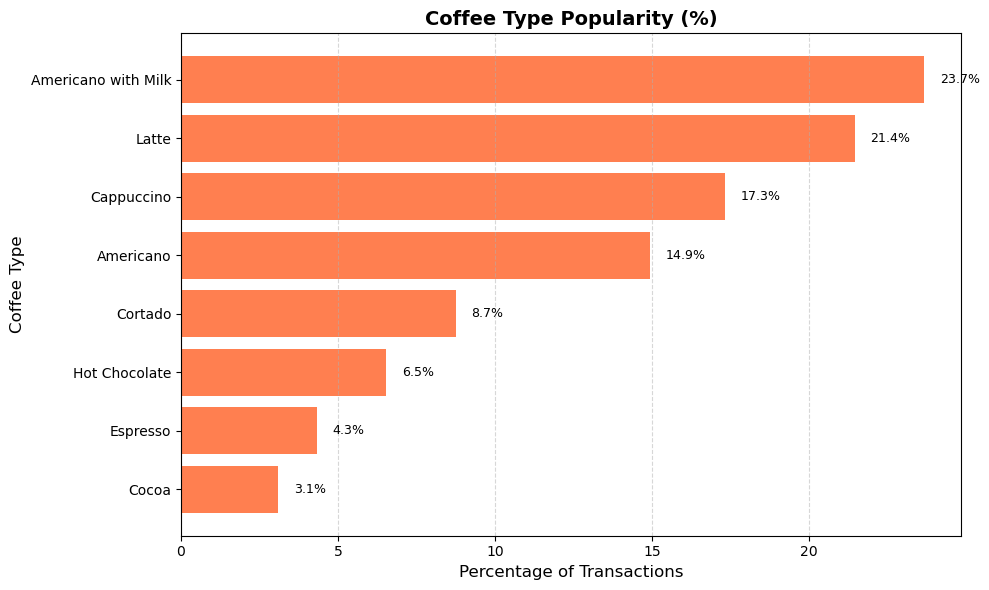

In [4]:
# Calculate coffee type proportions

coffee_props = df['coffee_name'].value_counts(normalize=True).sort_values() * 100

# Plot horizontal bar chart

plt.figure(figsize=(10, 6))
bars = plt.barh(coffee_props.index, coffee_props.values, color='coral')

# Add percentage labels to each bar

for i, (coffee, percent) in enumerate(coffee_props.items()):
    plt.text(percent + 0.5, i, f'{percent:.1f}%', va='center', fontsize=9)

# Chart formatting

plt.title('Coffee Type Popularity (%)', fontsize=14, fontweight='bold')
plt.xlabel('Percentage of Transactions', fontsize=12)
plt.ylabel('Coffee Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [5]:
coffee_df = pd.DataFrame(df['coffee_name'].value_counts(normalize=True).sort_values(ascending=False) * 100)
coffee_df.columns = ['proportion']
coffee_df['cumulative'] = coffee_df['proportion'].cumsum().round(2)
print(coffee_df)

                     proportion  cumulative
coffee_name                                
Americano with Milk   23.654016       23.65
Latte                 21.447485       45.10
Cappuccino            17.299206       62.40
Americano             14.916152       77.32
Cortado                8.737864       86.05
Hot Chocolate          6.531333       92.59
Espresso               4.324801       96.91
Cocoa                  3.089144      100.00


Add Cumulative Share

.cumsum(): calculates the cumulative sum of the proportions—how much of total sales is covered as you go down the list.
This tells you how much of total sales is covered as you go down the list of coffee types. For example:
- Top 1 coffee might cover 23.65%
- Top 2 together might cover 45.10%
- Top 3 might cover 62.40%

In [6]:
# Convert to datetime format

df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [7]:
# Create a month column

df['month'] = df['date'].dt.strftime('%Y-%m')
df

,date,datetime,cash_type,card,money,coffee_name,month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,2024-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,2024-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,2024-03
...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,2024-07
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,2024-07
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,2024-07
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,2024-07


- Extracts the year and month in YYYY-MM format.
- Useful for monthly trend analysis or grouping by billing cycles.

In [8]:
# Create a day column

df['day'] = df['date'].dt.strftime('%w')
df

,date,datetime,cash_type,card,money,coffee_name,month,day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,2024-03,5
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03,5
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03,5
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,2024-03,5
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,2024-03,5
...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,2024-07,3
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,2024-07,3
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,2024-07,3
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,2024-07,3


- Extracts the weekday number (0 = Sunday, 6 = Saturday).
- Helps analyze which days are busiest or slowest.

In [9]:
# You can map weekday names for clarity

df['weekday'] = df['date'].dt.day_name()

# Create an hour column

df['hour'] = df['datetime'].dt.strftime('%H')
df

,date,datetime,cash_type,card,money,coffee_name,month,day,weekday,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,2024-03,5,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03,5,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03,5,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,2024-03,5,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,2024-03,5,Friday,13
...,...,...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,2024-07,3,Wednesday,20
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,2024-07,3,Wednesday,20
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,2024-07,3,Wednesday,21
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,2024-07,3,Wednesday,21


- Extracts the hour of the day (00 to 23).
- Perfect for identifying peak hours or planning staffing schedules

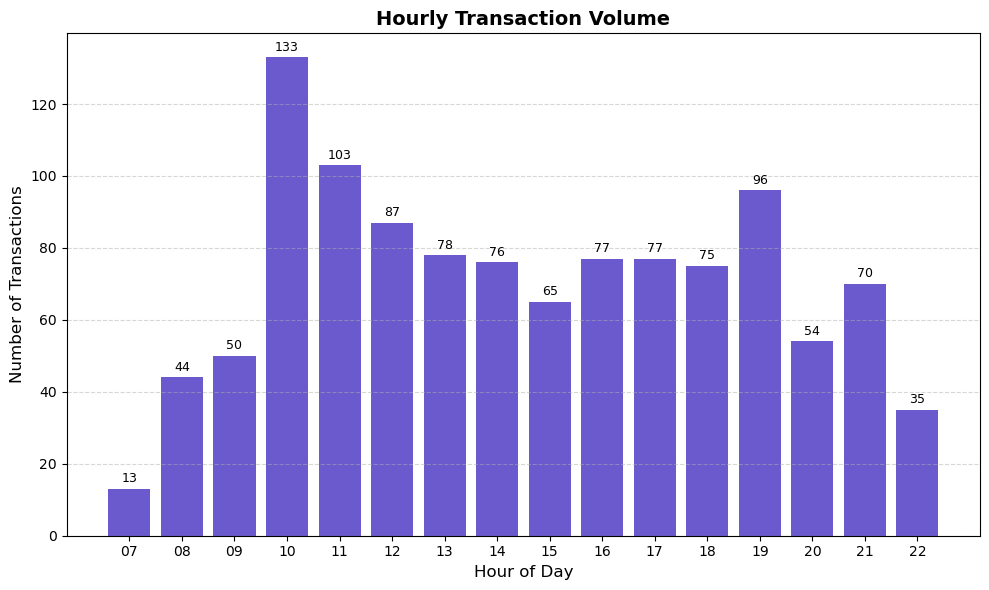

In [10]:
# Step 1: Prepare hourly counts

hourly_counts = df['hour'].value_counts().sort_index()

# Step 2: Plot the bar chart

plt.figure(figsize=(10, 6))
bars = plt.bar(hourly_counts.index, hourly_counts.values, color='slateblue')

# Step 3: Add value labels on top of each bar

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Step 4: Format the chart

plt.title('Hourly Transaction Volume', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   weekday      1133 non-null   object        
 9   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 88.6+ KB


In [12]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,weekday,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,5,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,5,Friday,13


In [13]:
df['date'].min(),df['date'].max()

(Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00'))

[Timestamp('2024-03-01 00:00:00'),Timestamp('2024-07-31 00:00:00')]
- The time range of this data set is from 2023-3-1 to 2024-7-31

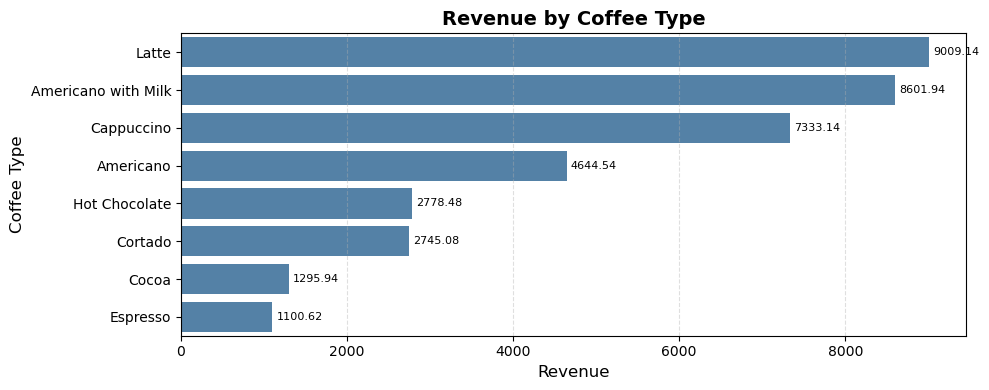

In [14]:
# Group by coffee type and sum revenue
revenue_data = df.groupby('coffee_name', as_index=False)['money'].sum()
revenue_data = revenue_data.sort_values(by='money', ascending=False)

# Plot revenue by coffee type
plt.figure(figsize=(10, 4))
ax = sns.barplot(data=revenue_data, x='money', y='coffee_name', color='steelblue')

# Add revenue labels to each bar
ax.bar_label(ax.containers[0], fontsize=8, padding=3)

# Chart formatting
plt.title('Revenue by Coffee Type', fontsize=14, fontweight='bold')
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Coffee Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Insights Recap
- Latte is your top revenue generator—likely due to high demand or premium pricing.
- Espresso is at the bottom—possibly a niche product or lower price point.
- This chart helps you prioritize inventory, pricing, and promotional strategy.
